# How to Train YOLO11 Object Detection on a Custom Dataset
-----------

YOLO11 builds on the advancements introduced in YOLOv10 and YOLOv11 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from 2.6M to 56.9M parameters, and capable of achieving from 39.5 to 54.7 mAP on the COCO dataset.

# Setup

## Before you start

Let's make sure that we have access to GPU. We can use nvidia-smi command to do that.

In [11]:
!nvidia-smi

Thu Oct 17 15:54:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090        Off | 00000000:1A:00.0 Off |                  N/A |
| 30%   28C    P8              21W / 350W |  23587MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

NOTE: To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [12]:
import os
HOME = os.getcwd()
print(HOME)

/home/workspace/phamdinhthuc/sex_vision


# Install YOLO11 via Ultralytics

In [13]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.15 🚀 Python-3.10.15 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
Setup complete ✅ (80 CPUs, 376.6 GB RAM, 1641.7/1719.7 GB disk)


# Inference with model pre-trained on COCO dataset

## CLI

NOTE: CLI requires no customization or Python code. You can simply run all tasks from the terminal with the yolo command.

In [14]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

Ultralytics 8.3.15 🚀 Python-3.10.15 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /home/workspace/phamdinhthuc/sex_vision/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 75.3ms
Speed: 5.0ms preprocess, 75.3ms inference, 745.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


NOTE: Result annotated image got saved in `{HOME}/runs/detect/predict/`. Let's display it.

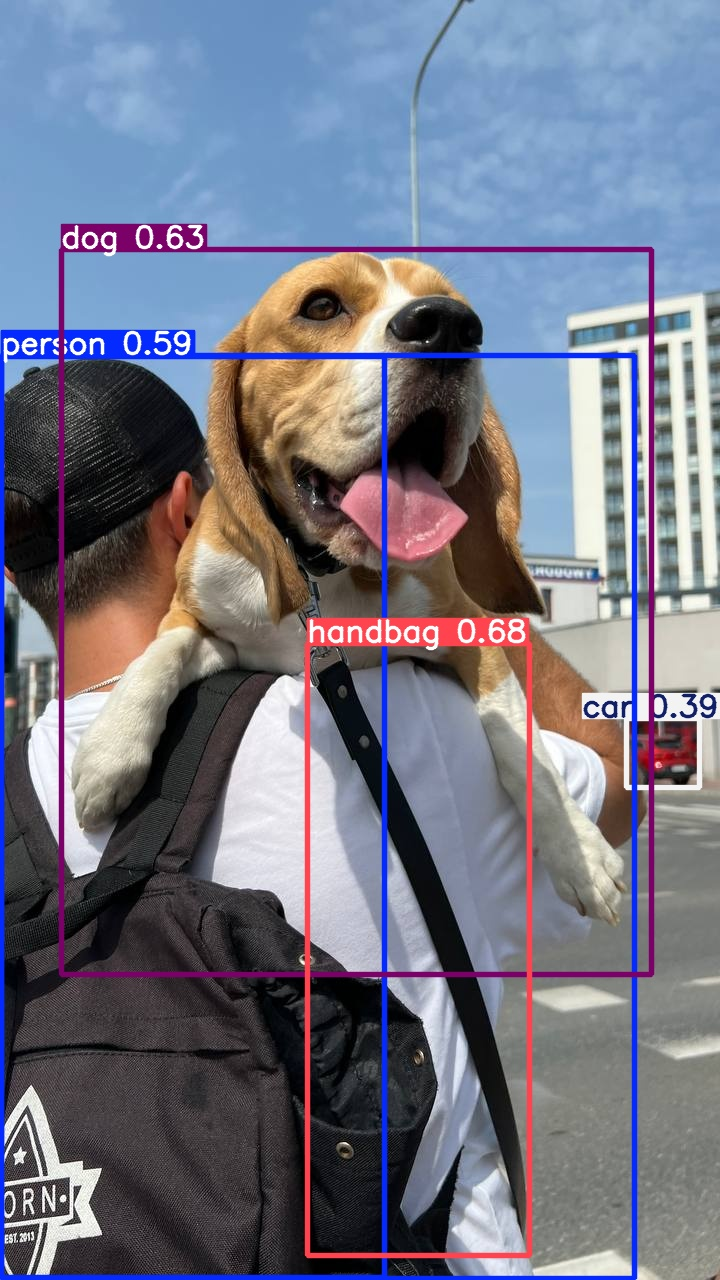

In [16]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/predict/dog.jpg', width=600)

# Fine-tune YOLO11 on custom dataset

NOTE: When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the datasets available on Roboflow Universe. When downloading, make sure to select the `yolov11` export format.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OXvXJ0bZOgV80sC8WC8P")
project = rf.workspace("liangdianzhong").project("-qvdww")
version = project.version(3)
dataset = version.download("yolov11")

## Custom Training

In [1]:
%cd {HOME}
num_device = 5 # 0 or [0, 1]
!yolo task=detect mode=train model=yolo11s.pt data={HOME}/两点钟模型-3/data.yaml epochs=10 imgsz=640 plots=True device={num_device} batch=64

Ultralytics 8.3.15 🚀 Python-3.10.15 torch-2.4.1+cu121 CUDA:5 (NVIDIA GeForce RTX 3090, 24260MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/home/workspace/phamdinhthuc/sex_vision/两点钟模型-3/data.yaml, epochs=10, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=5, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

In [4]:
!ls {HOME}/runs/detect/train4/

F1_curve.png			 labels.jpg		 val_batch0_labels.jpg
PR_curve.png			 labels_correlogram.jpg  val_batch0_pred.jpg
P_curve.png			 results.csv		 val_batch1_labels.jpg
R_curve.png			 results.png		 val_batch1_pred.jpg
args.yaml			 train_batch0.jpg	 val_batch2_labels.jpg
confusion_matrix.png		 train_batch1.jpg	 val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	 weights


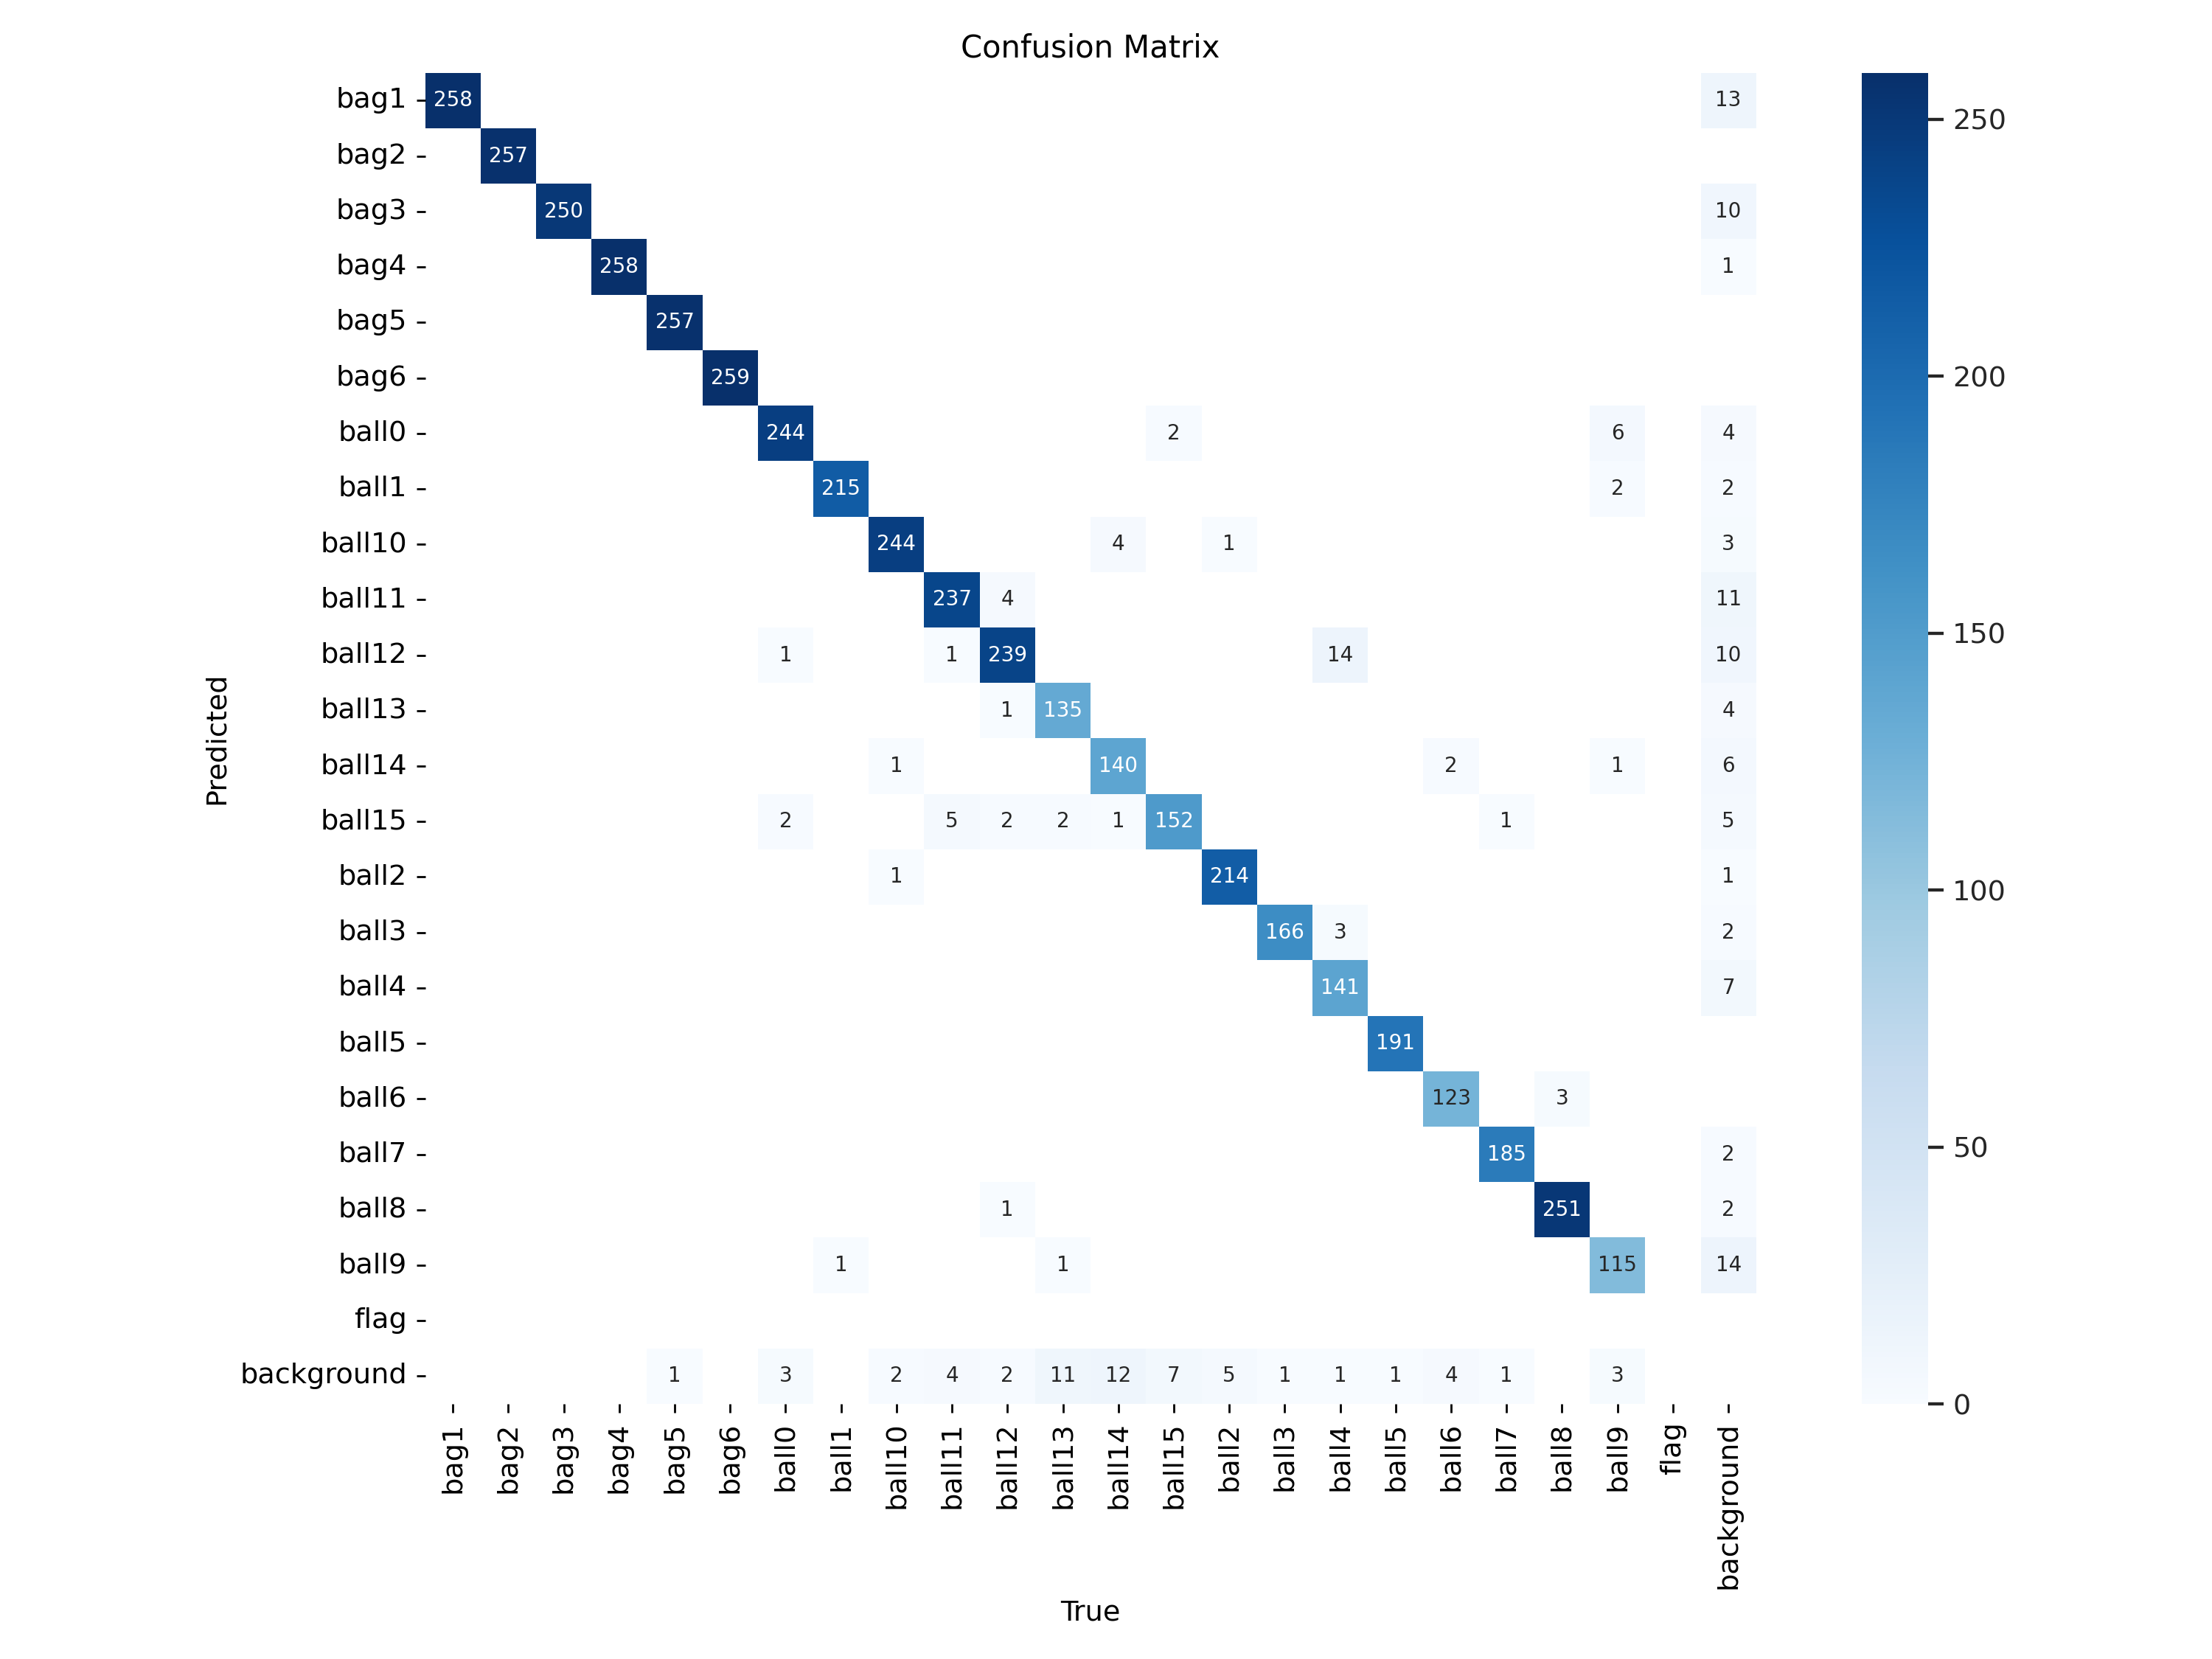

In [5]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

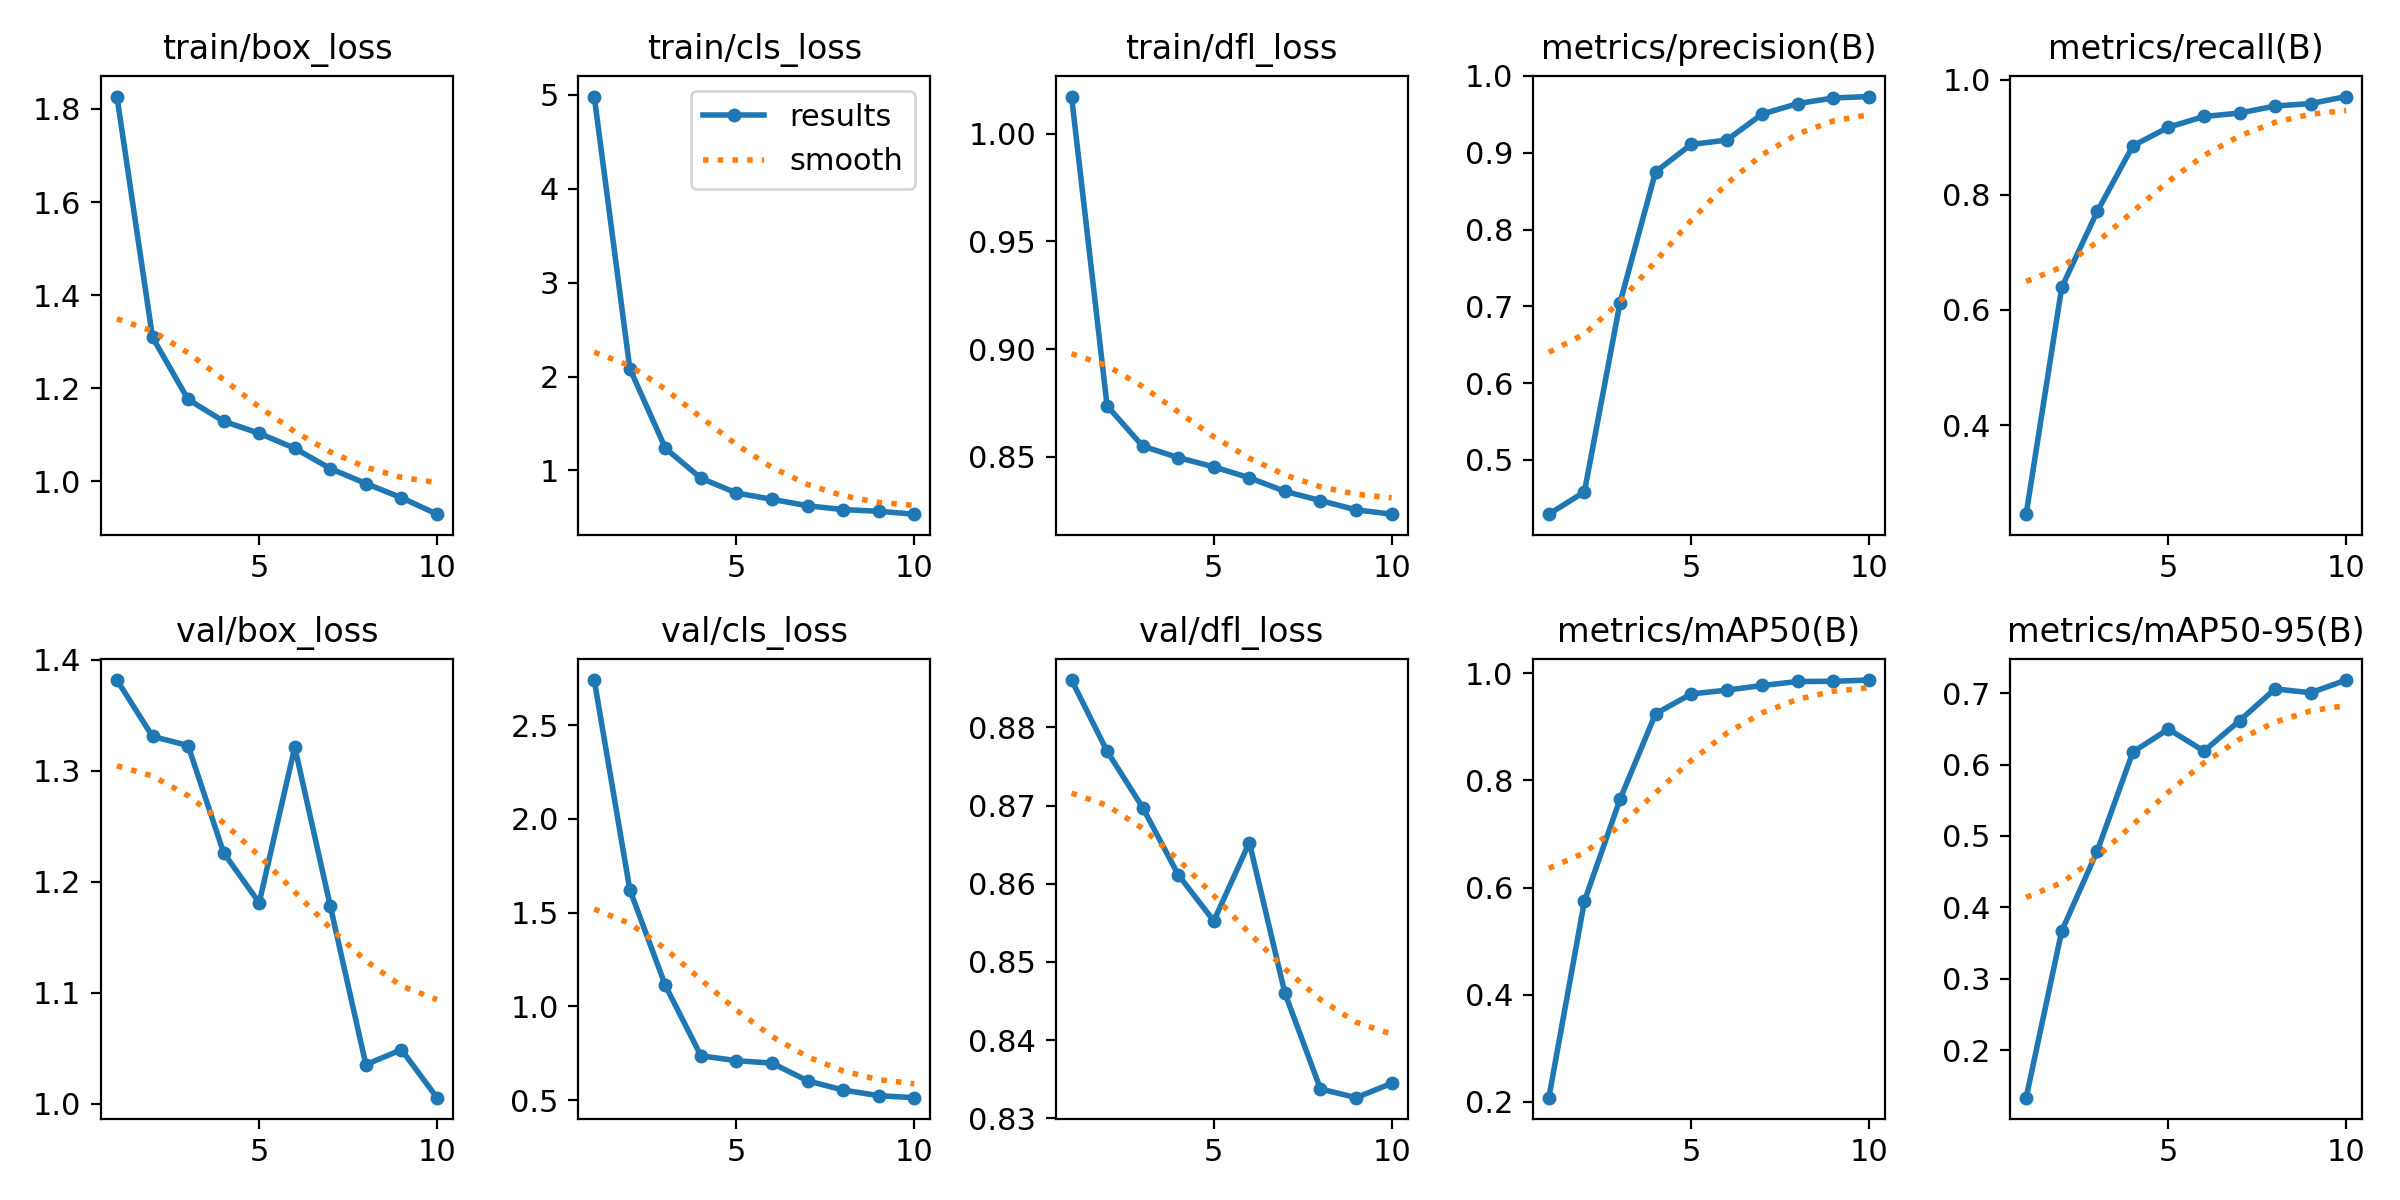

In [6]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

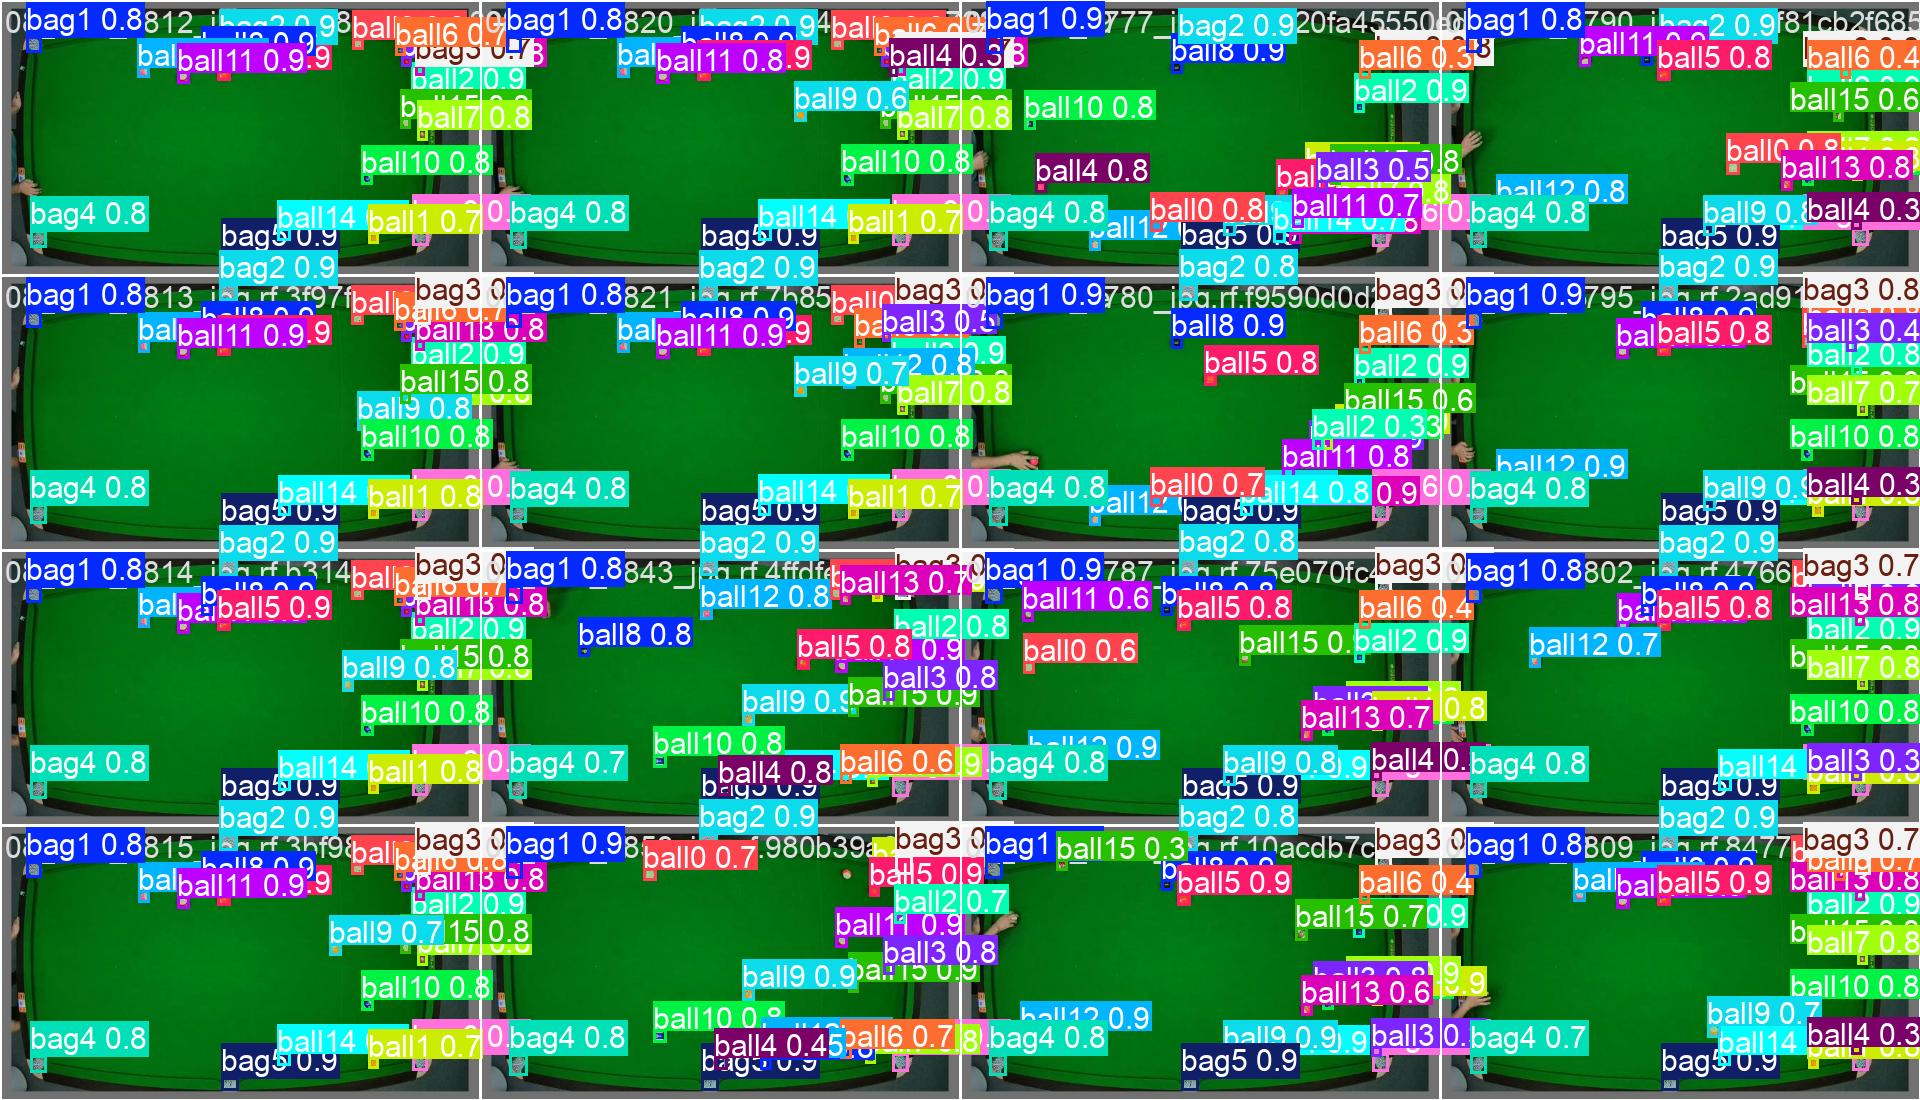

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# Validate fine-tuned model

In [10]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={HOME}/两点钟模型-3/data.yaml device=5 batch=64

Ultralytics 8.3.15 🚀 Python-3.10.15 torch-2.4.1+cu121 CUDA:5 (NVIDIA GeForce RTX 3090, 24260MiB)
YOLO11s summary (fused): 238 layers, 9,421,701 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /home/workspace/phamdinhthuc/sex_vision/两点钟模型-3/valid/labels.
val: WARNING ⚠️ /home/workspace/phamdinhthuc/sex_vision/两点钟模型-3/valid/images/08_21C_0250_jpg.rf.b164fca68a7a644a126019aa776912c1.jpg: 2 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        259       4652      0.973      0.971      0.987       0.72
                  bag1        258        258      0.961          1      0.995      0.701
                  bag2        257        257      0.998          1      0.995      0.868
                  bag3        250        250      0.961          1      0.994      0.761
                  bag4        258        258      0.996          1      0.995       0.72
                  bag5        258        258      0.997 

# Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={HOME}/两点钟模型-3/test/images save=True

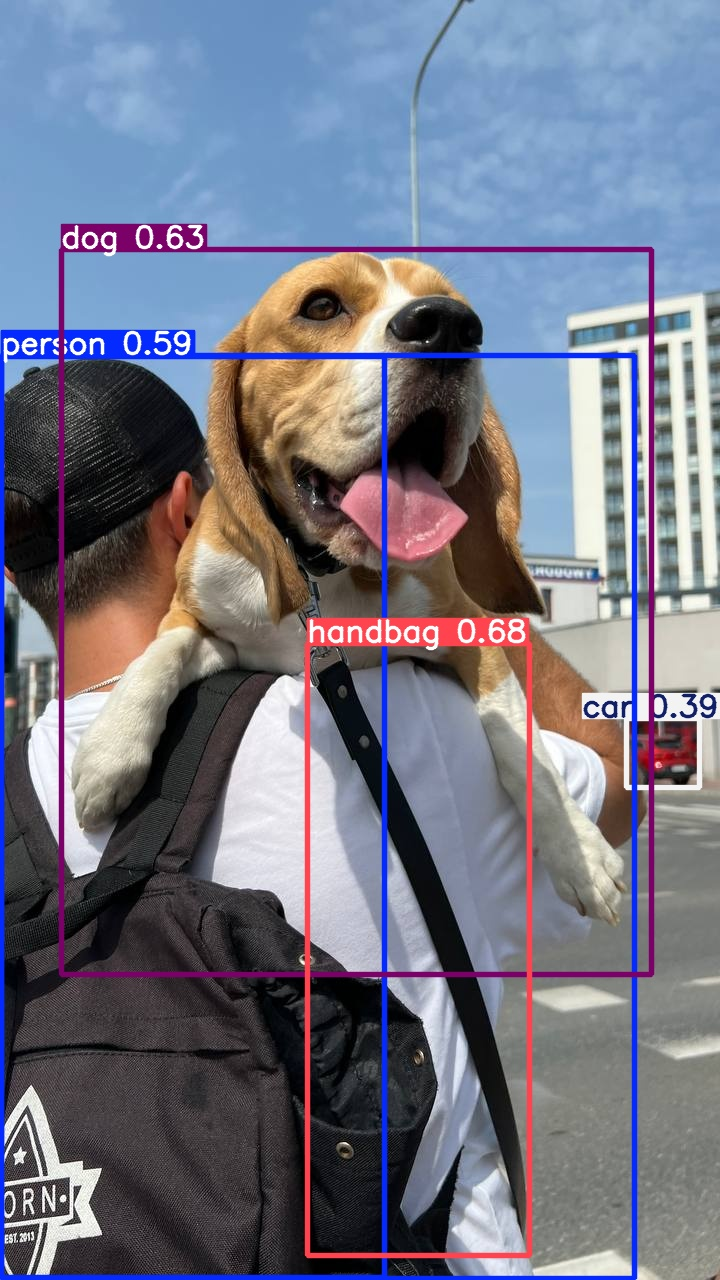

In [17]:
import glob
import os
from IPython.display import Image as IPyImage, display

for img in glob.glob(f'{HOME}/runs/detect/predict/*.jpg', recursive=True)[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")